In [21]:
from ase.build import mx2
from gpaw import GPAW, PW, FermiDirac

calc = GPAW(mode=PW(400),
            xc='PBE',
            setups={'Mo': '6'},
            parallel={'band': 1, 'domain': 1},
            occupations=FermiDirac(width=0.001),
            kpts={'size': (30, 30, 1), 'gamma': True})

slab = mx2(formula='MoS2', a=3.16, thickness=3.17, vacuum=5.0)
slab.set_calculator(calc)
slab.get_potential_energy()
calc.diagonalize_full_hamiltonian(nbands=50)
calc.write('gs_MoS2.gpw', mode='all')


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  1.3.0
 |___|_|             

User:   titan@Titan
Date:   Tue Feb 27 14:38:38 2018
Arch:   x86_64
Pid:    31750
Python: 2.7.12
gpaw:   /usr/local/lib/python2.7/dist-packages/gpaw
_gpaw:  /usr/local/lib/python2.7/dist-packages/_gpaw.so
ase:    /home/titan/.local/lib/python2.7/site-packages/ase (version 3.15.0)
numpy:  /usr/local/lib/python2.7/dist-packages/numpy (version 1.14.1)
scipy:  /usr/local/lib/python2.7/dist-packages/scipy (version 1.0.0)
units:  Angstrom and eV
cores:  1

Input parameters:
  kpts: {gamma: True,
         size: (30, 30, 1)}
  mode: {ecut: 400.0,
         name: pw}
  occupations: {name: fermi-dirac,
                width: 0.001}
  setups: {Mo: 6}
  xc: PBE

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

Mo-setup:
  name: Molybdenum
  id: 777abf82e11571d8662b25ce786408fd
  Z: 42
  valence: 6
  core: 36
  charge: 0.0
  file: /hom

iter:  36  14:40:46  -5.21  -3.54   -21.459970    0             
iter:  37  14:40:49  -5.28  -3.55   -21.459971    0             
iter:  38  14:40:53  -5.42  -3.54   -21.459973    0             
iter:  39  14:40:56  -5.12  -3.56   -21.459974    0             
iter:  40  14:40:59  -5.48  -3.93   -21.459975    0             
iter:  41  14:41:02  -5.81  -4.07   -21.459976    0             
iter:  42  14:41:06  -5.84  -4.09   -21.459976    0             
iter:  43  14:41:09  -5.99  -4.11   -21.459977    0             
iter:  44  14:41:13  -5.98  -4.14   -21.459977    0             
iter:  45  14:41:16  -6.10  -4.14   -21.459978    0             
iter:  46  14:41:19  -6.12  -4.22   -21.459978    0             
iter:  47  14:41:22  -6.31  -4.29   -21.459978    0             
iter:  48  14:41:26  -6.41  -4.29   -21.459978    0             
iter:  49  14:41:29  -6.44  -4.32   -21.459978    0             
iter:  50  14:41:32  -6.47  -4.47   -21.459979    0             
iter:  51  14:41:35  -6.5

In [23]:
import numpy as np
from gpaw.response.bse import BSE
from gpaw.response.df import DielectricFunction

ecut = 50
eshift = 0.8
eta = 0.05

bse = BSE('gs_MoS2.gpw',
          ecut=ecut,
          valence_bands=[8],
          conduction_bands=[9],
          truncation='2D',
          nbands=50,
          eshift=eshift,
          mode='BSE',
          integrate_gamma=1,
          txt='bse_MoS2_trun.txt')

bse.get_polarizability(filename='pol_bse_MoS2_trun.csv',
                       eta=eta,
                       pbc=[True, True, False],
                       write_eig='bse_MoS2_eig_trun.dat',
                       w_w=np.linspace(0, 5, 5001))

(array([0.000e+00, 1.000e-03, 2.000e-03, ..., 4.998e+00, 4.999e+00,
        5.000e+00]), array([ 1.17235936+0.02418246j,  1.17284277+0.02420282j,
         1.1733266 +0.02422322j, ..., -1.18781211+0.02478623j,
        -1.18731705+0.02476517j, -1.18682242+0.02474415j]))

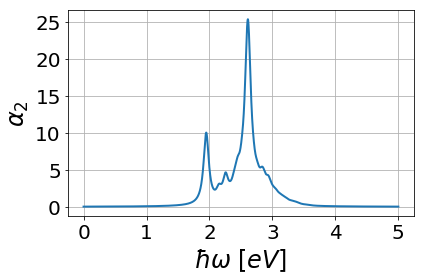

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

a = np.loadtxt('pol_bse_MoS2_trun.csv', delimiter=',')
plt.plot(a[:, 0], a[:, 2], label='BSE - Truncated', lw=2)

plt.xlabel(r'$\hbar\omega\;[eV]$', size=24)
plt.ylabel(r'$\alpha_2$', size=24)
plt.xticks(size=20)
plt.yticks(size=20)
plt.tight_layout()
plt.grid()

# plt.show()
plt.savefig('bse_MoS2.png')